# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empty lists to hold data
city_name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind = []
country = []
date = []

# variables for counting cities
count = 0
total = 1
setno = 1
print(f'Beginning Data Retrieval\n-----------------------------')
for city in cities:
    # url for api call
    response = requests.get(query_url + city).json()
    # look for data and add to lists
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        # printing the city number
        print(f"Processing Record {count} of Set {setno} | {total} | {city}")
        # increment counters
        count += 1
        total += 1
        # reset count and increment set number when it is 50
        if count % 50 == 0:
            setno += 1
            count = 0
    # exceptions
    except:
        # null values
        print("City not found. Skipping...")
print(f'-----------------------------\nTotal Records Processed: {total}\n-----------------------------\n')
print(f'-----------------------------\nData Retrieval Complete\n-----------------------------\n')


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | 1 | camana
Processing Record 1 of Set 1 | 2 | barrow
Processing Record 2 of Set 1 | 3 | east london
Processing Record 3 of Set 1 | 4 | buchanan
City not found. Skipping...
Processing Record 4 of Set 1 | 5 | camacha
Processing Record 5 of Set 1 | 6 | cockburn town
Processing Record 6 of Set 1 | 7 | busselton
Processing Record 7 of Set 1 | 8 | butaritari
Processing Record 8 of Set 1 | 9 | saldanha
Processing Record 9 of Set 1 | 10 | maxixe
Processing Record 10 of Set 1 | 11 | kapaa
Processing Record 11 of Set 1 | 12 | ibanda
Processing Record 12 of Set 1 | 13 | faya
Processing Record 13 of Set 1 | 14 | jamestown
Processing Record 14 of Set 1 | 15 | pangnirtung
City not found. Skipping...
Processing Record 15 of Set 1 | 16 | nikolskoye
Processing Record 16 of Set 1 | 17 | fairbanks
Processing Record 17 of Set 1 | 18 | yellowknife
City not found. Skipping...
Processing Record 18 of Set 1 | 19 | vaini
Proc

Processing Record 15 of Set 4 | 166 | marabba
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 4 | 167 | avera
Processing Record 17 of Set 4 | 168 | port elizabeth
Processing Record 18 of Set 4 | 169 | longyearbyen
Processing Record 19 of Set 4 | 170 | wanning
Processing Record 20 of Set 4 | 171 | talnakh
Processing Record 21 of Set 4 | 172 | bom jesus
Processing Record 22 of Set 4 | 173 | margate
Processing Record 23 of Set 4 | 174 | haines junction
Processing Record 24 of Set 4 | 175 | coihaique
Processing Record 25 of Set 4 | 176 | manokwari
Processing Record 26 of Set 4 | 177 | lazaro cardenas
Processing Record 27 of Set 4 | 178 | dargaville
Processing Record 28 of Set 4 | 179 | rawson
Processing Record 29 of Set 4 | 180 | venice
Processing Record 30 of Set 4 | 181 | kopidlno
Processing Record 31 of Set 4 | 182 | haapiti
Processing Record 32 of Set 4 | 183 | tasiilaq
Processing Record 33 of Set 4 | 184 | vardo
Processing Record 34 of Set 4 | 185 |

Processing Record 32 of Set 7 | 333 | tilichiki
Processing Record 33 of Set 7 | 334 | ipixuna
Processing Record 34 of Set 7 | 335 | andenes
Processing Record 35 of Set 7 | 336 | irbeyskoye
City not found. Skipping...
Processing Record 36 of Set 7 | 337 | nyurba
Processing Record 37 of Set 7 | 338 | isla mujeres
Processing Record 38 of Set 7 | 339 | batagay
Processing Record 39 of Set 7 | 340 | plakhtiyivka
Processing Record 40 of Set 7 | 341 | faanui
Processing Record 41 of Set 7 | 342 | ongandjera
Processing Record 42 of Set 7 | 343 | hamilton
Processing Record 43 of Set 7 | 344 | lompoc
Processing Record 44 of Set 7 | 345 | palmer
Processing Record 45 of Set 7 | 346 | katsuura
Processing Record 46 of Set 7 | 347 | santa cruz de la palma
Processing Record 47 of Set 7 | 348 | maragogi
Processing Record 48 of Set 7 | 349 | cap malheureux
Processing Record 49 of Set 7 | 350 | petropavlovsk-kamchatskiy
Processing Record 0 of Set 8 | 351 | huaicheng
Processing Record 1 of Set 8 | 352 | akl

Processing Record 48 of Set 10 | 499 | alta floresta
City not found. Skipping...
Processing Record 49 of Set 10 | 500 | myshkin
Processing Record 0 of Set 11 | 501 | vestmannaeyjar
Processing Record 1 of Set 11 | 502 | anadyr
Processing Record 2 of Set 11 | 503 | iwanai
Processing Record 3 of Set 11 | 504 | nahariyya
Processing Record 4 of Set 11 | 505 | kuala terengganu
Processing Record 5 of Set 11 | 506 | zyryanovsk
Processing Record 6 of Set 11 | 507 | axim
Processing Record 7 of Set 11 | 508 | kattivakkam
Processing Record 8 of Set 11 | 509 | christchurch
Processing Record 9 of Set 11 | 510 | puerto colombia
Processing Record 10 of Set 11 | 511 | aguimes
Processing Record 11 of Set 11 | 512 | normandin
Processing Record 12 of Set 11 | 513 | tsogni
Processing Record 13 of Set 11 | 514 | caravelas
City not found. Skipping...
Processing Record 14 of Set 11 | 515 | yatou
Processing Record 15 of Set 11 | 516 | sfantu gheorghe
Processing Record 16 of Set 11 | 517 | havoysund
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dataframe
cities_dict = {
            'City': city_name,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': temp_max,
            'Humidity': humidity,
            'Cloudiness': clouds,
            'Wind Speed': wind,
            'Country': country,
            'Date': date,
}
show_dict = pd.DataFrame(cities_dict)
show_dict.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camaná,-16.6228,-72.7111,60.76,82,58,7.07,PE,1628642395
1,Barrow,71.2906,-156.7887,37.42,78,90,10.36,US,1628642395
2,East London,-33.0153,27.9116,54.52,46,0,6.78,ZA,1628642395
3,Buchanan,5.8808,-10.0467,76.86,87,79,7.18,LR,1628642396
4,Camacha,33.0833,-16.3333,70.56,83,40,8.05,PT,1628642396
5,Cockburn Town,21.4612,-71.1419,82.85,77,0,19.73,TC,1628642396
6,Busselton,-33.6500,115.3333,50.04,73,100,10.31,AU,1628642397
7,Butaritari,3.0707,172.7902,83.26,67,10,12.12,KI,1628642397
8,Saldanha,-33.0117,17.9442,42.85,72,0,10.33,ZA,1628642397
9,Maxixe,-23.8597,35.3472,63.79,71,35,8.46,MZ,1628642398


In [5]:
# pull the needed columns
cs = show_dict[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Date']]
# set quartiles
quartiles = cs.quantile([0.25, 0.5,0.75])
# get stats
cities_stats = cs.aggregate(['count','mean','std', 'min','max'])
# add quartile data to dataframe
cities_stats = cities_stats.append(quartiles)
# set the order of the index
cities_stats.index = ['count', 'mean', 'std', 'min', '0.25', '0.5', '0.75', 'max']
# rename quartile rows to %
cities_stats = cities_stats.rename(index={'0.25': '25%', '0.5': '50%', '0.75': '75%'})
cities_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.557157,17.978912,69.330710,72.026643,52.326821,7.602274,1.628642e+09
std,32.885505,90.189929,13.311864,20.458908,40.833397,5.439143,8.464168e+01
min,-54.800000,-175.200000,33.820000,12.000000,0.000000,0.000000,1.628642e+09
25%,78.218600,179.316700,104.920000,100.000000,100.000000,29.930000,1.628643e+09
50%,-7.513050,-64.000000,59.640000,61.000000,6.000000,3.600000,1.628642e+09
75%,22.285500,21.850000,70.750000,78.000000,57.000000,6.240000,1.628642e+09
max,47.735450,101.299400,80.105000,87.000000,98.000000,10.360000,1.628643e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# dataframe that has cities over 100% humidity
over_hun = show_dict[show_dict['Humidity'] > 100]
# print how many cities are over 100%
print(f'Amount of cities with humidity over 100%: {len(over_hun)}')
# drop the values from the dataframe
show_dict = show_dict.drop(over_hun.index,inplace=False)
show_dict

Amount of cities with humidity over 100%: 0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camaná,-16.6228,-72.7111,60.76,82,58,7.07,PE,1628642395
1,Barrow,71.2906,-156.7887,37.42,78,90,10.36,US,1628642395
2,East London,-33.0153,27.9116,54.52,46,0,6.78,ZA,1628642395
3,Buchanan,5.8808,-10.0467,76.86,87,79,7.18,LR,1628642396
4,Camacha,33.0833,-16.3333,70.56,83,40,8.05,PT,1628642396
...,...,...,...,...,...,...,...,...,...
558,Otane,-39.8833,176.6333,61.39,68,29,3.83,NZ,1628642577
559,Laas,46.6166,10.7002,64.02,83,0,3.89,IT,1628642577
560,Saint-Louis,16.3333,-15.0000,85.64,52,0,14.81,SN,1628642577
561,Dicabisagan,17.0818,122.4157,85.91,65,50,3.62,PH,1628642578


In [7]:
# set quartiles for humidity
qts = show_dict['Humidity'].quantile([0.25, 0.5,0.75])
# set lower quartile
lowerq = qts[0.25]
# set upper quartile
upperq = qts[0.75]
# calculate interquartile range
iqr = upperq-lowerq
# calculate the lower bound
lower_bound = lowerq - (1.5*iqr)
# calculate the upper bound
upper_bound = upperq + (1.5*iqr)

# dataframe for outliers
outliers = show_dict[(show_dict['Humidity'] < lower_bound) | (show_dict['Humidity'] > upper_bound)]
# variable to hold the index values of the outliers
outliers_list = outliers.index
# dataframe containing the outliers
outliers_df = show_dict.iloc[outliers_list]
outliers_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
58,Ukiah,39.1502,-123.2078,103.51,19,1,11.50,US,1628642415
73,Adrar,20.5022,-10.0711,87.75,17,0,17.20,MR,1628642420
116,Saint George,37.1041,-113.5841,102.79,17,1,1.01,US,1628642139
129,Atar,20.5169,-13.0499,85.23,19,5,11.36,MR,1628642439
193,Riyadh,24.6877,46.7219,84.34,13,0,3.74,SA,1628642460
195,Birjand,32.8663,59.2211,59.47,20,0,6.91,IR,1628642461
247,Alice Springs,-23.7000,133.8833,71.15,21,0,0.00,AU,1628642478
266,Alamosa,37.4695,-105.8700,82.38,12,1,5.75,US,1628642484
278,Cedar City,37.6775,-113.0619,83.39,19,1,12.66,US,1628642488
309,Arlit,18.7369,7.3853,95.13,18,60,8.05,NE,1628642498


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# drop the outliers from the dataframe
clean_city_data = show_dict.drop(outliers_df.index,inplace=False)

# # export output to txt file
# #
clean_city_data.to_csv(output_data_file, index=False, encoding="utf-8")
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camaná,-16.6228,-72.7111,60.76,82,58,7.07,PE,1628642395
1,Barrow,71.2906,-156.7887,37.42,78,90,10.36,US,1628642395
2,East London,-33.0153,27.9116,54.52,46,0,6.78,ZA,1628642395
3,Buchanan,5.8808,-10.0467,76.86,87,79,7.18,LR,1628642396
4,Camacha,33.0833,-16.3333,70.56,83,40,8.05,PT,1628642396
...,...,...,...,...,...,...,...,...,...
558,Otane,-39.8833,176.6333,61.39,68,29,3.83,NZ,1628642577
559,Laas,46.6166,10.7002,64.02,83,0,3.89,IT,1628642577
560,Saint-Louis,16.3333,-15.0000,85.64,52,0,14.81,SN,1628642577
561,Dicabisagan,17.0818,122.4157,85.91,65,50,3.62,PH,1628642578


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

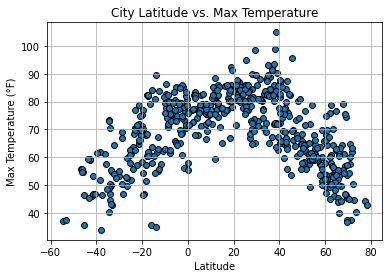

In [9]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp',grid=True, title="City Latitude vs. Max Temperature",edgecolors='black', s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")
plt.show()

#### Plot shows that cities near equator have a higher temperature.

## Latitude vs. Humidity Plot

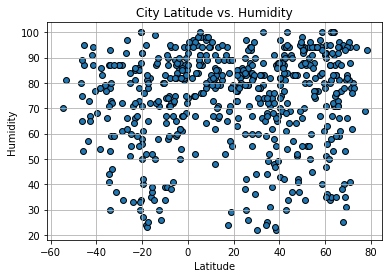

In [10]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity',grid=True, title="City Latitude vs. Humidity",edgecolors='black',s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Humidity.png")
plt.show()

#### Plot does have have aclear correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

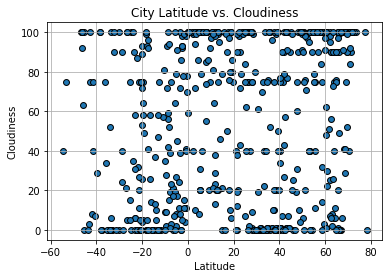

In [11]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness',grid=True, title="City Latitude vs. Cloudiness",edgecolors='black',s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")
plt.show()

#### No clear correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

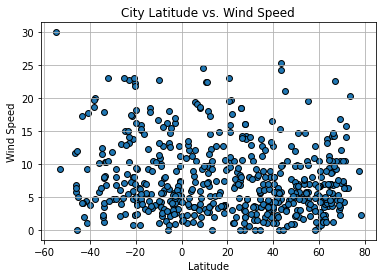

In [12]:
# config scatter plot
clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed',grid=True, title="City Latitude vs. Wind Speed",edgecolors='black',s=35)
# x & y labels of plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# save png of plot
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")
plt.show()

#### No clear correlation between latitude and wind speed.

## Linear Regression

In [13]:
# create variables to put the cities in northern/southern hemispheres
nh = clean_city_data[clean_city_data['Lat'] >= 0]
sh = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.669458866834427


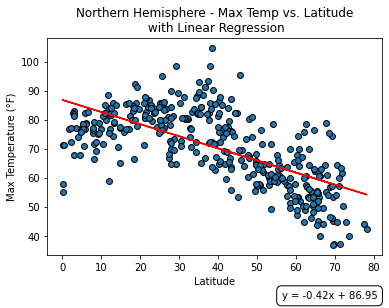

In [14]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Max Temp']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()


#### Temperature increases closer to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6913323314055315


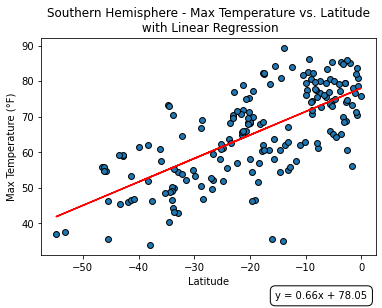

In [15]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Max Temp']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Max Temperature vs. Latitude Linear Regression.png")
plt.show()

#### Temperature increases closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.11051060054704732


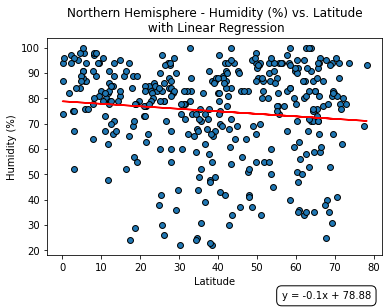

In [16]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Humidity']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

#### No clear relationship between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02650573980845694


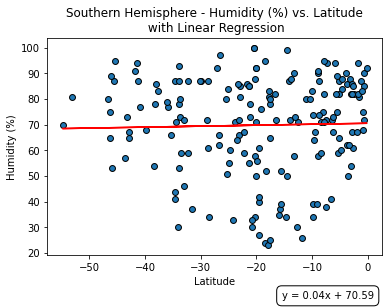

In [17]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Humidity']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

#### No clear relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.013013026589221278


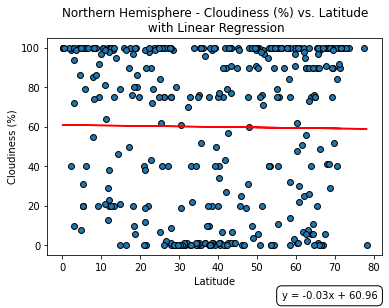

In [18]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Cloudiness']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

#### No clear relationship between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.019980666056366485


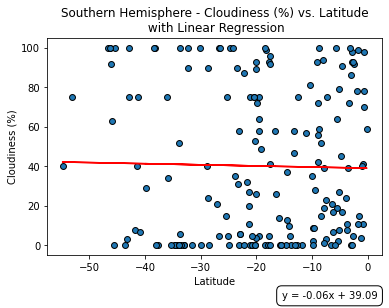

In [19]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Cloudiness']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

#### No clear relationship between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.08307982856784994


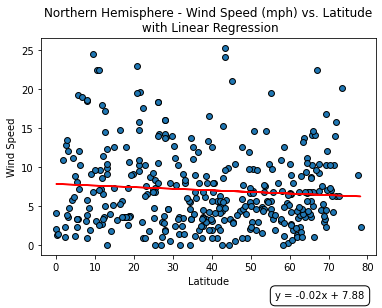

In [20]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Wind Speed']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

#### There is a slight decrease on wind speed closer to the equator, but there is no clear relationship between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13239917475746957


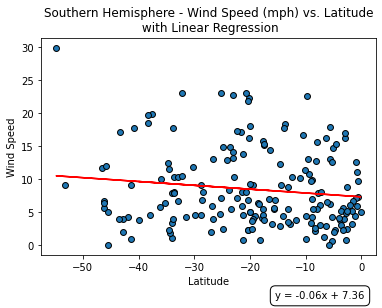

In [21]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Wind Speed']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, -.2),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude\n with Linear Regression')
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

#### There is a slight decrease on wind speed closer to the equator, but there is no clear relationship between latitude and wind speed.